Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

Load CSV datasets

In [ ]:
train_inputs = pd.read_csv('train_inputs.csv')
train_labels = pd.read_csv('train_labels.csv')
test_inputs = pd.read_csv('test_inputs.csv')
test_labels = pd.read_csv('test_labels.csv')

Implement KNN

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(train_inputs, train_labels, test_point, k):
    distances = []
    for i, train_point in train_inputs.iterrows():
        dist = euclidean_distance(train_point, test_point)
        distances.append((dist, train_labels.iloc[i, 0]))

    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    k_nearest_labels = [label for (_, label) in k_nearest]
    return max(set(k_nearest_labels), key=k_nearest_labels.count)

10-fold cross-validation (from 1 to 30)

In [ ]:
k_values = range(1, 31)
avg_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, train_inputs, train_labels.values.ravel(), cv=10, scoring='accuracy')
    avg_accuracies.append(np.mean(scores))

Plot the results

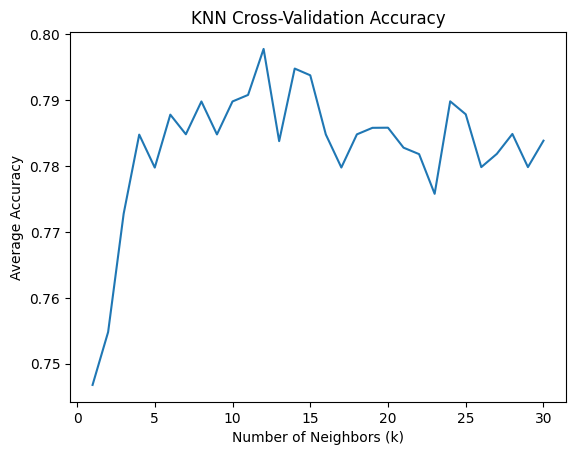

In [ ]:
plt.plot(k_values, avg_accuracies)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy')
plt.title('KNN Cross-Validation Accuracy')
plt.show()

Determine best k

In [ ]:
best_k = k_values[np.argmax(avg_accuracies)]
best_accuracy = max(avg_accuracies)
print(f"Best number of neighbors: {best_k} has an accuracy of: {best_accuracy}")

# Ensure column names match
test_inputs.columns = train_inputs.columns

# Ensure the same number of features
test_inputs = test_inputs[train_inputs.columns]

Best number of neighbors: 12 has an accuracy of: 0.7977575757575759


Test accuracy

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(train_inputs, train_labels.values.ravel())
test_accuracy = knn.score(test_inputs, test_labels)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7522935779816514


Save graph

In [ ]:
plt.savefig('knn_cross_validation_accuracy.png')

<Figure size 640x480 with 0 Axes>